## Agglomerative Clustering
@Ram Vempati

### Agglemorative Clustering
All data points / obervatons start as their own clsuter. Clusters meeting some criteria are merged. This point is repeated, growing clsuters until some end point is reached.

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize = (15, 8))
plt.style.use('seaborn-whitegrid')

In [3]:
cars = pd.read_csv("mtcars.csv")

cars.columns = ['car_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

print('Dimensions of the dataset: {0}'.format(cars.shape))
cars.head(10)

Dimensions of the dataset: (32, 12)


,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
X = cars.ix[:, (1,3,4,6)].values
Y = cars.ix[:, (9)].values

/Users/ramakrishnavempati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In scikit-learn, AgglomerativeClustering uses the linkage parameter to determine the merging strategy to minimize the 

1. variance of merged clusters (ward)
2. average of distance between observations from pairs of clusters (average)
3. maximum distance between observations from pairs of clusters (complete).

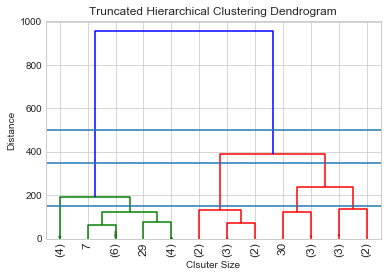

In [6]:
Z = linkage(X, 'ward')

dendrogram(Z, 
           truncate_mode = "lastp", # show only the last p merged clusters
           p = 12, # show only the last p merged clusters
           leaf_rotation=90., 
           leaf_font_size=12., 
           show_contracted=True # to get a distribution impression in truncated branches
          )
           
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Clsuter Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=350)
plt.axhline(y=150)

plt.show()

* horizontal lines are cluster merges
* vertical lines tell you which clusters/labels were part of merge forming that new cluster
* heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

In [7]:
k = 2
HC1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
HC1.fit(X)
metrics.accuracy_score(Y, HC1.labels_)

0.78125

In [8]:
HC2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
HC2.fit(X)
metrics.accuracy_score(Y, HC2.labels_)

0.4375

In [9]:
HC3 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
HC3.fit(X)
metrics.accuracy_score(Y, HC3.labels_)

0.78125

In [10]:
HC4 = AgglomerativeClustering(n_clusters = k, affinity = 'manhattan', linkage = 'average')
HC4.fit(X)
metrics.accuracy_score(Y, HC4.labels_)

0.71875

In [11]:
HC1.labels_

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1])